In [ ]:
!sudo apt-get install openjdk-7-jdk 
!sudo apt-get install python-dev
!sudo pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update- qq
!apt-get install fonts-nanum* -qq

E: Invalid operation update-


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, 'ÏïàÎÖï')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)


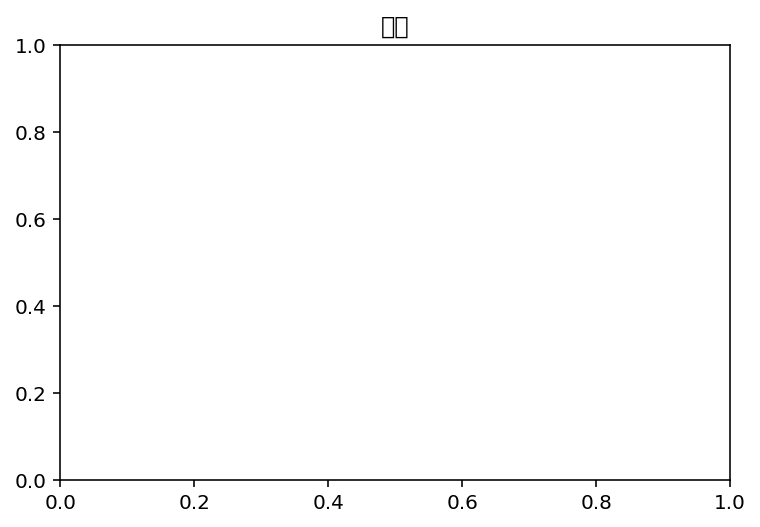

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.title('ÏïàÎÖï')

In [ ]:
import re
import os
import nltk
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

In [ ]:
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [ ]:
import os
from konlpy.tag import Okt
from collections import Counter

# Okt ÌòïÌÉúÏÜå Î∂ÑÏÑù Í∞ùÏ≤¥ ÏÉùÏÑ±
ok_twitter = Okt()

# Ï†ÄÏû•Îêú ÌååÏùºÏùò ÏúÑÏπò ÌÉêÏÉâ ÌõÑ, fileÎ≥ÄÏàòÏóê Ï†ÄÏû•
file = open('/content/drive/MyDrive/dataset/text/KakaoTalk_yhj_group.txt','r',encoding='utf-8')
total_lines = file.readlines() # txtÌååÏùºÏùÑ Ï§Ñ Îã®ÏúÑÎ°ú ÏùΩÏùå
file.close()
print(total_lines)

# ÌÅ¨Î°§ÎßÅ ÎåìÍ∏ÄÌååÏùº Í∞ÄÏ†∏ÏôÄÏÑú reply_text Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
reply_text = []
for line in total_lines:
  reply_text.append(line[:-1])

# ÌòïÌÉúÏÜå Î∂ÑÎ•òÌïòÍ≥† ÌôïÏù∏ ÌïòÍ∏∞
sentences_tag = []
for sentence in reply_text:
  morph = ok_twitter.pos(sentence)
  sentences_tag.append(morph)

# Î™ÖÏÇ¨Îßå Ï∂úÎ†•Ìï¥ Î≥¥Í∏∞
'''
for my_sentence in sentences_tag:
	for word, tag in my_sentence:
		if tag in ['Noun']:
			print(word)
'''

# ÌïÑÏöîÌïú ÌíàÏÇ¨Îßå Ï∂îÏ∂úÌï¥Î≥¥Í∏∞(Î™ÖÏÇ¨Î•º bucket listÏóê Îã¥Í∏∞)
stopwords = ['Ïò§ÌõÑ','Ïò§Ï†Ñ','ÏÇ¨ÏßÑ','Ïù¥Î™®Ìã∞ÏΩò']
bucket_list = []
for my_sentence in sentences_tag:
    for word, tag in my_sentence:
        if tag in ['Noun'] and len(word)>1 and (word not in stopwords):
            bucket_list.append(word)
        
# Îã®Ïñ¥ ÎπàÎèÑÏàò Íµ¨ÌïòÍ∏∞
# Í∞Å ÏõêÏÜåÏùò Ï∂úÌòÑ ÌöüÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Counter Î™®ÎìàÏùÑ ÌôúÏö©ÌïúÎã§.
from collections import Counter
counts = Counter(bucket_list)



# Î™ÖÏÇ¨ ÎπàÎèÑ ÏàúÏÑúÎåÄÎ°ú ÏÉÅÏúÑ 30Í∞ú Ï∂úÎ†•
print(counts.most_common(30))

# Î™ÖÏÇ¨ÏôÄ ÌòïÏö©ÏÇ¨Î•º Î™®Îëê Ï∂îÏ∂úÌïòÍ≥† ÏÉÅÏúÑ 50Í∞úÎ•º Ï∂úÎ†•
bucket_list_2 = []
for my_sentence in sentences_tag:
  for word, tag in my_sentence:
    if tag in ['Noun','Adjective']:
      bucket_list_2.append(word)
counts = Counter(bucket_list)
print(counts.most_common(50))

['Í≥µÎ™®Ï†Ñ ÎèÑÏ†ÑÌåÄ ÎãòÍ≥º Ïπ¥Ïπ¥Ïò§ÌÜ° ÎåÄÌôî\n', 'Ï†ÄÏû•Ìïú ÎÇ†Ïßú : 2022-06-21 00:40:12\n', '\n', '--------------- 2022ÎÖÑ 5Ïõî 27Ïùº Í∏àÏöîÏùº ---------------\n', 'ÎÇòÍ±¥Ï£ºÎãòÏù¥ Ïù¥ÌïòÍ≤ΩÎãò, Ïù¥ÌïòÍ≤ΩÎãò, Ïú†Î≥ëÌõàÎãòÏùÑ Ï¥àÎåÄÌïòÏòÄÏäµÎãàÎã§.\n', 'ÎÇòÍ±¥Ï£ºÎãòÏù¥ ÌåÄÏ±ÑÌåÖÏùÑ ÏãúÏûëÌñàÏñ¥Ïöî!\n', 'ÌåÄÏ±ÑÌåÖÎ∞©ÏóêÏÑú Ï£ºÍ≥† Î∞õÏùÄ ÎåÄÌôîÏôÄ ÎØ∏ÎîîÏñ¥Îäî Ïã§ÏãúÍ∞Ñ Î≥¥Í¥ÄÎêòÍ≥†, ÎÇòÏ§ëÏóê Ï∞∏Ïó¨Ìïú Î©§Î≤ÑÎèÑ Ìï®Íªò Î≥º Ïàò ÏûàÏäµÎãàÎã§.\n', '[ÎÇòÍ±¥Ï£º] [Ïò§ÌõÑ 11:58] ÏïàÎÖïÌïòÏã≠ÎãàÍπå\n', '[Ïú†Î≥ëÌõà] [Ïò§ÌõÑ 11:59] Ï†äÏùÄÏù¥Îì§ Ìï†Ìï†Ìï† ÏïàÎÖï\n', '[Ïú†Î≥ëÌõà] [Ïò§ÌõÑ 11:59] „Öã„Öã„Öã„Öã„Öã„Öã„Öã\n', '--------------- 2022ÎÖÑ 5Ïõî 28Ïùº ÌÜ†ÏöîÏùº ---------------\n', '[ÎÇòÍ±¥Ï£º] [Ïò§Ï†Ñ 12:00] ÏùºÎã® ÏòàÏÑ† ÌÜµÍ≥ºÌï¥Ïïº Î∂ÑÏÑùÎèÑ ÌïòÍ≤†ÎÑ§Ïó¨\n', '[Ïú†Î≥ëÌõà] [Ïò§Ï†Ñ 12:00] Î∂ÑÏÑùÍ∏∞Í∞Ñ\n', '[Ïú†Î≥ëÌõà] [Ïò§Ï†Ñ 12:00] 1Îã¨Ïù¥ÎÇòÏ£ºÎäîÍ±∞Î≥¥Î©¥\n', '[Ïú†Î≥ëÌõà] [Ïò§Ï†Ñ 12:00] Ïñ¥Î†µÎÇòÎ≥∏ÎåÄ\n', '[Ïú†Î≥ëÌõà] [Ïò§Ï†Ñ 12:00] „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã\n', '[Ïù¥ÌïòÍ≤Ω] [Ïò§Ï†

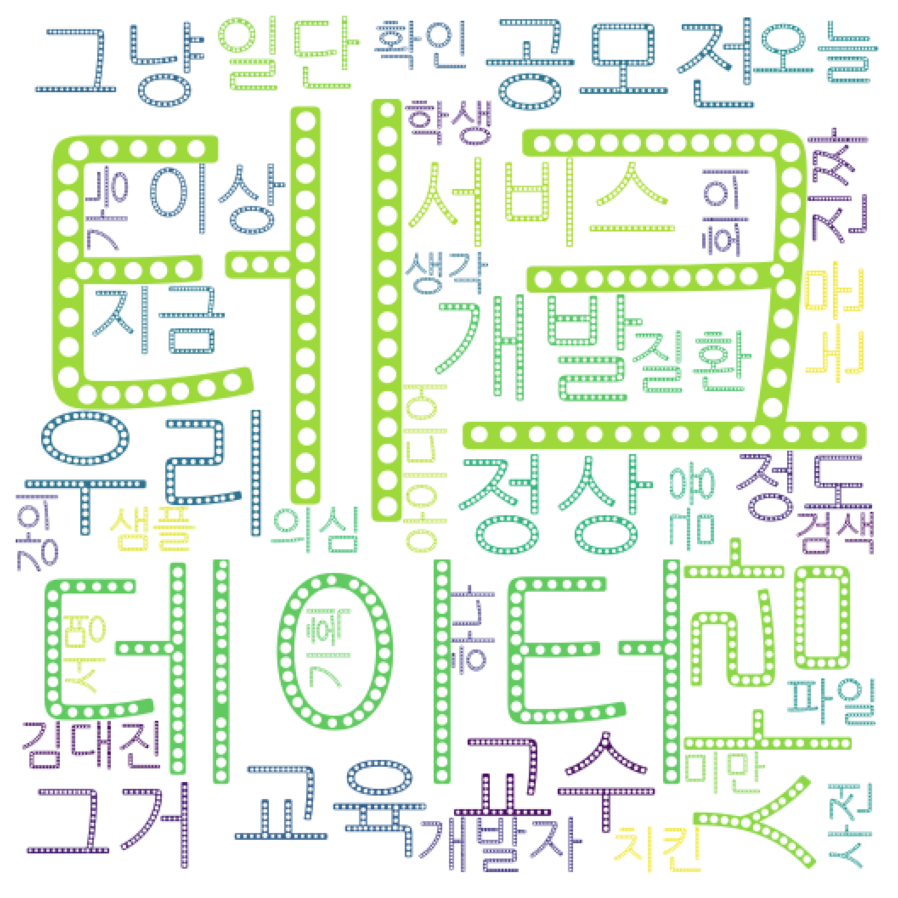

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path = path,
                    background_color = 'white',
                    width=512, height=512,
                    max_font_size=500,
                    max_words=40)
wc.generate_from_frequencies(counts)

plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Save to png
wc.to_file('/content/drive/MyDrive/dataset/text/finggle_word.jpg')


In [ ]:
!pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 262 kB 5.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 161 kB 47.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87 kB 6.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87 kB 6.6 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=7ed9c36209d05db45dcc12037e1c9735db8932284682f37ea2896a27663d99ab
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=d2de33666dbcf1fc80f0bd715d45fcccf7295e1697dfdec29fdf6a9d50a2b008
 

In [ ]:
import stylecloud

In [ ]:
stylecloud.gen_stylecloud(text=counts,
                          icon_name="fab fa-twitter",
                          palette="colorbrewer.diverging.Spectral_11",
                          background_color='black',
                          gradient="horizontal",
                          font_path=path,
                          output_name="/content/drive/MyDrive/dataset/text/finggle_analysis.jpg")

In [ ]:
'''
- file_path: ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞Î•º ÌÖçÏä§Ìä∏ Î¨∏ÏÑúÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
- text: ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞Î•º ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏúºÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
- font_path: ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í∑∏Î¶¥ pathÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
- size: ÏÇ¨Ïù¥Ï¶àÎ•º ÏßÄÏ†ï, (1024, 512)Í≥º Í∞ôÏùÄ ÌòïÏãùÏúºÎ°ú ÏûÖÎ†•Ìï©ÎãàÎã§.
- background_color: Î∞∞Í≤ΩÏÉâÏùÑ ÏßÄÏ†ïÌïúÎã§. ÏÉâÏù¥Î¶ÑÏùÑ ÏûÖÎ†•ÌïòÎ©¥ ÎêúÎã§. ( Ïòà) white )
- icon_name: Ïñ¥Îñ§ Î™®ÏñëÏúºÎ°ú Í∑∏Î¶¥ ÏßÄ ÏûÖÎ†•Ìï©ÎãàÎã§. fab fa-twitter(Ìä∏ÏõåÌÑ∞ Î™®Ïñë), fas fa-dog(Í∞ïÏïÑÏßÄ), fas fa-flag(ÍπÉÎ∞ú), fas fa-fish(Î¨ºÍ≥†Í∏∞) Îì±Ïù¥ ÏûàÎã§. ÎùÑÏñ¥Ïì∞Í∏∞ ÏïûÏùÄ Ìè∞Ìä∏Î•º ÏùòÎØ∏ÌïòÍ≥†, Îí§ÏóêÎäî Î™®ÏñëÏùÑ ÏùòÎØ∏ÌïúÎã§. Í∑∏Î¶¥ Ïàò ÏûàÎäî Î™®ÏñëÏùÄ Í∞ÄÏßÄÏàòÍ∞Ä Ï¢Ä ÎßéÏùÄÎç∞, stylecoludÌå®ÌÇ§ÏßÄÍ∞Ä ÏÑ§ÏπòÎêú Ìè¥ÎçîÏóêÏÑú staticÌè¥Îçî Î∞ëÏóê fontawesome.min.cssÌååÏùºÏùÑ ÌôïÏù∏ÌïòÎ©¥ Ïïå Ïàò ÏûàÎã§.
- font_path: Ìè∞Ìä∏Î•º ÏßÄÏ†ïÌïúÎã§.
- output_name: Í≤∞Í≥ºÎ•º ÌååÏùºÎ°ú Ï†ÄÏû•ÌïúÎã§.
'''

'\n- file_path: ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞Î•º ÌÖçÏä§Ìä∏ Î¨∏ÏÑúÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.\n- text: ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞Î•º ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòïÏúºÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.\n- font_path: ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í∑∏Î¶¥ pathÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.\n- size: ÏÇ¨Ïù¥Ï¶àÎ•º ÏßÄÏ†ï, (1024, 512)Í≥º Í∞ôÏùÄ ÌòïÏãùÏúºÎ°ú ÏûÖÎ†•Ìï©ÎãàÎã§.\n- background_color: Î∞∞Í≤ΩÏÉâÏùÑ ÏßÄÏ†ïÌïúÎã§. ÏÉâÏù¥Î¶ÑÏùÑ ÏûÖÎ†•ÌïòÎ©¥ ÎêúÎã§. ( Ïòà) white )\n- icon_name: Ïñ¥Îñ§ Î™®ÏñëÏúºÎ°ú Í∑∏Î¶¥ ÏßÄ ÏûÖÎ†•Ìï©ÎãàÎã§. fab fa-twitter(Ìä∏ÏõåÌÑ∞ Î™®Ïñë), fas fa-dog(Í∞ïÏïÑÏßÄ), fas fa-flag(ÍπÉÎ∞ú), fas fa-fish(Î¨ºÍ≥†Í∏∞) Îì±Ïù¥ ÏûàÎã§. ÎùÑÏñ¥Ïì∞Í∏∞ ÏïûÏùÄ Ìè∞Ìä∏Î•º ÏùòÎØ∏ÌïòÍ≥†, Îí§ÏóêÎäî Î™®ÏñëÏùÑ ÏùòÎØ∏ÌïúÎã§. Í∑∏Î¶¥ Ïàò ÏûàÎäî Î™®ÏñëÏùÄ Í∞ÄÏßÄÏàòÍ∞Ä Ï¢Ä ÎßéÏùÄÎç∞, stylecoludÌå®ÌÇ§ÏßÄÍ∞Ä ÏÑ§ÏπòÎêú Ìè¥ÎçîÏóêÏÑú staticÌè¥Îçî Î∞ëÏóê fontawesome.min.cssÌååÏùºÏùÑ ÌôïÏù∏ÌïòÎ©¥ Ïïå Ïàò ÏûàÎã§.\n- font_path: Ìè∞Ìä∏Î•º ÏßÄÏ†ïÌïúÎã§.\n- output_name: Í≤∞Í≥ºÎ•º ÌååÏùºÎ°ú Ï†ÄÏû•ÌïúÎã§.\n'